# RBD ADO Cluster Plot Comparison

Comparing the clusters for the RBD (Alpha, Delta, Omicron) graph.

---
### Alpha (Cluster 2)

In [224]:
import pandas as pd

# ESM-RBD Embedded
seed = 0
perplexity = 750
csv_file = f"rbd_ado/RBD.ADO.from-esm-mlm.CLS-embedded.sampled_seed0.tSNE-perplexity750.cluster2.csv"
esm_rbd_df = pd.read_csv(csv_file)
print(esm_rbd_df["Variant"].value_counts())

# ESM Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado/RBD.ADO.CLS-embedded.sampled_seed{seed}.tSNE-perplexity{perplexity}.cluster2.csv"
esm_df = pd.read_csv(csv_file)
print(esm_df["Variant"].value_counts())

# MSA + One-Hot Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado_msa/RBD.ADO.MSA.tSNE-perplexity{perplexity}.cluster2.csv"
msa_df = pd.read_csv(csv_file)
print(msa_df["Variant"].value_counts())

Variant
Alpha      21974
Omicron      218
Delta         93
Name: count, dtype: int64
Variant
Alpha      21980
Omicron      308
Delta        283
Name: count, dtype: int64
Variant
Alpha      21997
Omicron      427
Delta         93
Name: count, dtype: int64


In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn.layout.venn3 import DefaultLayoutAlgorithm
from matplotlib.patches import Patch

def plot_venn3(sets, sequences_variant, majority_variant):
    sns.set_style('ticks')
    sns.set_context("talk")
    plt.figure(figsize=(8, 4.5))
    colors = ["tab:blue", "tab:orange", "tab:green"]

    plt.title(f"Overlap of {sequences_variant} Sequences in Majority {majority_variant} Cluster")
    venn = venn3(
        layout_algorithm=DefaultLayoutAlgorithm(fixed_subset_sizes=(1, 1, 1, 1, 1, 1, 1)), # unweighted
        subsets=sets, 
        set_labels=('ESM-RBD', 'ESM', 'MSA'),
        set_colors=colors,
        alpha=0.7
    )

    # Outline each circle
    for circle in venn.patches:
        if circle:
            circle.set_edgecolor('black')  # Outline color
            circle.set_linewidth(1.5)        # Outline width (adjust as desired)

    # Set the set label colors
    for i, text in enumerate(venn.set_labels):
        text.set_color(colors[i])

    # Make the numbers in the diagram bold
    for subset_label in venn.subset_labels:
        if subset_label: 
            subset_label.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

Ground truth Alpha only in ESM RBD majority Alpha cluster (0 seq(s)):
set()
Ground truth Alpha only in ESM majority Alpha cluster (10 seq(s)):
{'EPI_ISL_11036678', 'EPI_ISL_3497312', 'EPI_ISL_2673783', 'EPI_ISL_1802084', 'EPI_ISL_11036528', 'EPI_ISL_1098250', 'EPI_ISL_1627570', 'EPI_ISL_3058159', 'EPI_ISL_3091093', 'EPI_ISL_1798651'}
Ground truth Alpha only in MSA majority Alpha cluster (1 seq(s)):
{'EPI_ISL_3948597'}


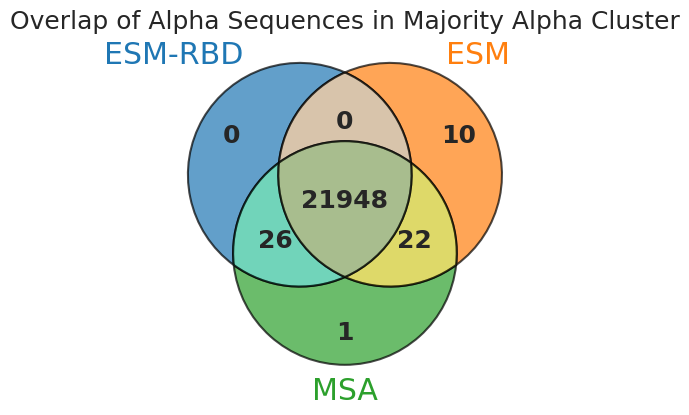

In [226]:
esm_rbd_alpha_df = esm_rbd_df[esm_rbd_df["Variant"] == "Alpha"]
esm_alpha_df = esm_df[esm_df["Variant"] == "Alpha"]
msa_alpha_df = msa_df[msa_df["Variant"] == "Alpha"]

# Convert columns to sets
set1 = set(esm_rbd_alpha_df["Seq ID"])
set2 = set(esm_alpha_df["Seq ID"])
set3 = set(msa_alpha_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Alpha only in ESM RBD majority Alpha cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Alpha only in ESM majority Alpha cluster ({len(only_in_set2)} seq(s)):\n{only_in_set2}")
print(f"Ground truth Alpha only in MSA majority Alpha cluster ({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Alpha", "Alpha")

Ground truth Delta only in ESM RBD majority Alpha cluster (1 seq(s)):
{'EPI_ISL_3063359'}
Ground truth Delta only in ESM majority Alpha cluster (192 seq(s):
{'EPI_ISL_6693891', 'EPI_ISL_5518019', 'EPI_ISL_7923176', 'EPI_ISL_6651953', 'EPI_ISL_4301857', 'EPI_ISL_3541269', 'EPI_ISL_6571435', 'EPI_ISL_7970489', 'EPI_ISL_9201789', 'EPI_ISL_7779573', 'EPI_ISL_4498136', 'EPI_ISL_8727839', 'EPI_ISL_3230558', 'EPI_ISL_7424778', 'EPI_ISL_7424112', 'EPI_ISL_5370460', 'EPI_ISL_5371942', 'EPI_ISL_3656681', 'EPI_ISL_6515457', 'EPI_ISL_3230491', 'EPI_ISL_8077772', 'EPI_ISL_8603962', 'EPI_ISL_5030205', 'EPI_ISL_6785048', 'EPI_ISL_2787132', 'EPI_ISL_6695445', 'EPI_ISL_7900020', 'EPI_ISL_6541443', 'EPI_ISL_8515072', 'EPI_ISL_6163749', 'EPI_ISL_6485362', 'EPI_ISL_4029497', 'EPI_ISL_10716776', 'EPI_ISL_6170401', 'EPI_ISL_8356800', 'EPI_ISL_9524269', 'EPI_ISL_9103207', 'EPI_ISL_9702426', 'EPI_ISL_8082583', 'EPI_ISL_2958832', 'EPI_ISL_11580749', 'EPI_ISL_9324200', 'EPI_ISL_8082783', 'EPI_ISL_4540026', 'EPI

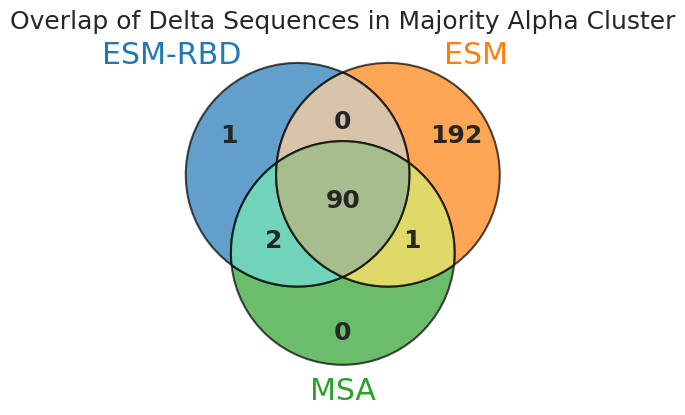

In [227]:
esm_rbd_delta_df = esm_rbd_df[esm_rbd_df["Variant"] == "Delta"]
esm_delta_df = esm_df[esm_df["Variant"] == "Delta"]
msa_delta_df = msa_df[msa_df["Variant"] == "Delta"]

# Convert columns to sets
set1 = set(esm_rbd_delta_df["Seq ID"])
set2 = set(esm_delta_df["Seq ID"])
set3 = set(msa_delta_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Delta only in ESM RBD majority Alpha cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Delta only in ESM majority Alpha cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Delta only in MSA majority Alpha cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Delta", "Alpha")

Ground truth Omicron only in ESM RBD majority Alpha cluster (39 seq(s)):
{'EPI_ISL_9512430', 'EPI_ISL_9202992', 'EPI_ISL_9417029', 'EPI_ISL_13762293', 'EPI_ISL_8518693', 'EPI_ISL_14721894', 'EPI_ISL_17214253', 'EPI_ISL_9202411', 'EPI_ISL_14722985', 'EPI_ISL_8336438', 'EPI_ISL_14722976', 'EPI_ISL_10088223', 'EPI_ISL_11084124', 'EPI_ISL_12803966', 'EPI_ISL_11931066', 'EPI_ISL_12272394', 'EPI_ISL_9631959', 'EPI_ISL_11344916', 'EPI_ISL_10114898', 'EPI_ISL_12133818', 'EPI_ISL_12749913', 'EPI_ISL_9582395', 'EPI_ISL_11905472', 'EPI_ISL_12704498', 'EPI_ISL_11948879', 'EPI_ISL_14561381', 'EPI_ISL_9227748', 'EPI_ISL_14952220', 'EPI_ISL_14722968', 'EPI_ISL_8284507', 'EPI_ISL_11630165', 'EPI_ISL_8513971', 'EPI_ISL_9227490', 'EPI_ISL_13073691', 'EPI_ISL_8336454', 'EPI_ISL_15582076', 'EPI_ISL_13295446', 'EPI_ISL_8746647', 'EPI_ISL_8336441'}
Ground truth Omicron only in ESM majority Alpha cluster (22 seq(s):
{'EPI_ISL_17068265', 'EPI_ISL_10103967', 'EPI_ISL_8402522', 'EPI_ISL_8801343', 'EPI_ISL_14429

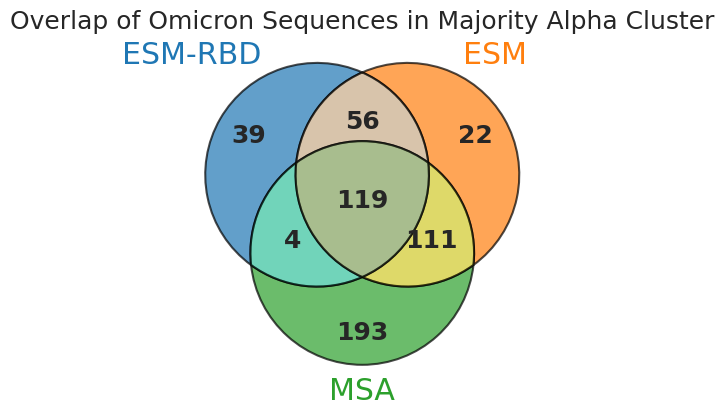

In [228]:
esm_rbd_omicron_df = esm_rbd_df[esm_rbd_df["Variant"] == "Omicron"]
esm_omicron_df = esm_df[esm_df["Variant"] == "Omicron"]
msa_omicron_df = msa_df[msa_df["Variant"] == "Omicron"]

# Convert columns to sets
set1 = set(esm_rbd_omicron_df["Seq ID"])
set2 = set(esm_omicron_df["Seq ID"])
set3 = set(msa_omicron_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Omicron only in ESM RBD majority Alpha cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Omicron only in ESM majority Alpha cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Omicron only in MSA majority Alpha cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Omicron", "Alpha")

---
### Delta (Cluster 0)

In [229]:
import pandas as pd

# ESM-RBD Embedded
seed = 0
perplexity = 750
csv_file = f"rbd_ado/RBD.ADO.from-esm-mlm.CLS-embedded.sampled_seed0.tSNE-perplexity750.cluster0.csv"
esm_rbd_df = pd.read_csv(csv_file)
print(esm_rbd_df["Variant"].value_counts())

# ESM Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado/RBD.ADO.CLS-embedded.sampled_seed{seed}.tSNE-perplexity{perplexity}.cluster0.csv"
esm_df = pd.read_csv(csv_file)
print(esm_df["Variant"].value_counts())

# MSA + One-Hot Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado_msa/RBD.ADO.MSA.tSNE-perplexity{perplexity}.cluster0.csv"
msa_df = pd.read_csv(csv_file)
print(msa_df["Variant"].value_counts())

Variant
Delta      21958
Alpha         79
Omicron       70
Name: count, dtype: int64
Variant
Delta      21786
Alpha         95
Omicron       76
Name: count, dtype: int64
Variant
Delta      21982
Omicron      103
Alpha         78
Name: count, dtype: int64


Ground truth Alpha only in ESM RBD majority Delta cluster (0 seq(s)):
set()
Ground truth Alpha only in ESM majority Delta cluster (26 seq(s)):
{'EPI_ISL_3155006', 'EPI_ISL_2235772', 'EPI_ISL_1741658', 'EPI_ISL_2400403', 'EPI_ISL_2315171', 'EPI_ISL_1647662', 'EPI_ISL_12425719', 'EPI_ISL_2862440', 'EPI_ISL_2487615', 'EPI_ISL_1741577', 'EPI_ISL_1528242', 'EPI_ISL_2022602', 'EPI_ISL_1389628', 'EPI_ISL_1838736', 'EPI_ISL_4372991', 'EPI_ISL_1257407', 'EPI_ISL_2002889', 'EPI_ISL_9949793', 'EPI_ISL_2981362', 'EPI_ISL_4505536', 'EPI_ISL_2933265', 'EPI_ISL_2445952', 'EPI_ISL_5337157', 'EPI_ISL_1616379', 'EPI_ISL_3391045', 'EPI_ISL_3717315'}
Ground truth Alpha only in MSA majority Delta cluster (0 seq(s)):
set()


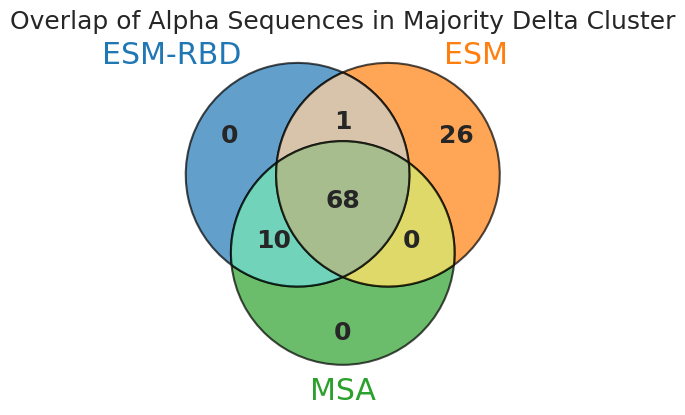

In [230]:
esm_rbd_alpha_df = esm_rbd_df[esm_rbd_df["Variant"] == "Alpha"]
esm_alpha_df = esm_df[esm_df["Variant"] == "Alpha"]
msa_alpha_df = msa_df[msa_df["Variant"] == "Alpha"]

# Convert columns to sets
set1 = set(esm_rbd_alpha_df["Seq ID"])
set2 = set(esm_alpha_df["Seq ID"])
set3 = set(msa_alpha_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Alpha only in ESM RBD majority Delta cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Alpha only in ESM majority Delta cluster ({len(only_in_set2)} seq(s)):\n{only_in_set2}")
print(f"Ground truth Alpha only in MSA majority Delta cluster ({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Alpha", "Delta")

Ground truth Delta only in ESM RBD majority Delta cluster (0 seq(s)):
set()
Ground truth Delta only in ESM majority Delta cluster (2 seq(s):
{'EPI_ISL_3428334', 'EPI_ISL_3428368'}
Ground truth Delta only in MSA majority Delta cluster ((3 seq(s)):
{'EPI_ISL_8136309', 'EPI_ISL_8289545', 'EPI_ISL_9021893'}


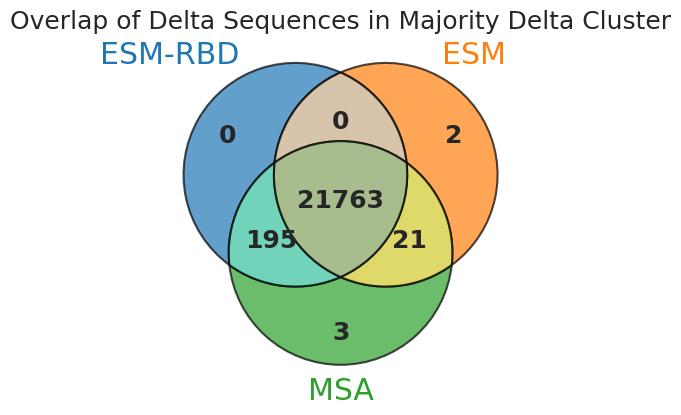

In [231]:
esm_rbd_delta_df = esm_rbd_df[esm_rbd_df["Variant"] == "Delta"]
esm_delta_df = esm_df[esm_df["Variant"] == "Delta"]
msa_delta_df = msa_df[msa_df["Variant"] == "Delta"]

# Convert columns to sets
set1 = set(esm_rbd_delta_df["Seq ID"])
set2 = set(esm_delta_df["Seq ID"])
set3 = set(msa_delta_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Delta only in ESM RBD majority Delta cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Delta only in ESM majority Delta cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Delta only in MSA majority Delta cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Delta", "Delta")

Ground truth Omicron only in ESM RBD majority Delta cluster (3 seq(s)):
{'EPI_ISL_9221341', 'EPI_ISL_13113895', 'EPI_ISL_13113891'}
Ground truth Omicron only in ESM majority Delta cluster (15 seq(s):
{'EPI_ISL_16237895', 'EPI_ISL_9227490', 'EPI_ISL_16914554', 'EPI_ISL_14217015', 'EPI_ISL_9366647', 'EPI_ISL_8746647', 'EPI_ISL_15866869', 'EPI_ISL_16282525', 'EPI_ISL_10066002', 'EPI_ISL_16237804', 'EPI_ISL_9227748', 'EPI_ISL_15116352', 'EPI_ISL_16018900', 'EPI_ISL_13564370', 'EPI_ISL_14217016'}
Ground truth Omicron only in MSA majority Delta cluster ((38 seq(s)):
{'EPI_ISL_10103942', 'EPI_ISL_8501964', 'EPI_ISL_9355889', 'EPI_ISL_8066155', 'EPI_ISL_8605053', 'EPI_ISL_9259673', 'EPI_ISL_8801343', 'EPI_ISL_16674995', 'EPI_ISL_10072789', 'EPI_ISL_8748482', 'EPI_ISL_9103130', 'EPI_ISL_9728278', 'EPI_ISL_8426158', 'EPI_ISL_8970112', 'EPI_ISL_8481755', 'EPI_ISL_9199857', 'EPI_ISL_9221395', 'EPI_ISL_9635053', 'EPI_ISL_9432713', 'EPI_ISL_9417772', 'EPI_ISL_10025588', 'EPI_ISL_8632979', 'EPI_ISL_8

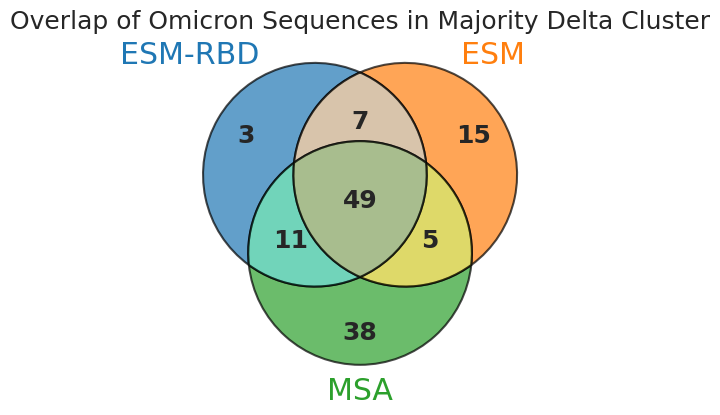

In [232]:
esm_rbd_omicron_df = esm_rbd_df[esm_rbd_df["Variant"] == "Omicron"]
esm_omicron_df = esm_df[esm_df["Variant"] == "Omicron"]
msa_omicron_df = msa_df[msa_df["Variant"] == "Omicron"]

# Convert columns to sets
set1 = set(esm_rbd_omicron_df["Seq ID"])
set2 = set(esm_omicron_df["Seq ID"])
set3 = set(msa_omicron_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Omicron only in ESM RBD majority Delta cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Omicron only in ESM majority Delta cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Omicron only in MSA majority Delta cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Omicron", "Delta")

--- 
### Omicron (Cluster 1)

In [233]:
import pandas as pd

# ESM-RBD Embedded
seed = 0
perplexity = 750
csv_file = f"rbd_ado/RBD.ADO.from-esm-mlm.CLS-embedded.sampled_seed0.tSNE-perplexity750.cluster1.csv"
esm_rbd_df = pd.read_csv(csv_file)
print(esm_rbd_df["Variant"].value_counts())

# ESM Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado/RBD.ADO.CLS-embedded.sampled_seed{seed}.tSNE-perplexity{perplexity}.cluster1.csv"
esm_df = pd.read_csv(csv_file)
print(esm_df["Variant"].value_counts())

# MSA + One-Hot Embedded
seed = 0
perplexity = 1000
csv_file = f"rbd_ado_msa/RBD.ADO.MSA.tSNE-perplexity{perplexity}.cluster1.csv"
msa_df = pd.read_csv(csv_file)
print(msa_df["Variant"].value_counts())

Variant
Omicron    21787
Delta         24
Alpha         22
Name: count, dtype: int64
Variant
Omicron    21691
Delta          6
Name: count, dtype: int64
Variant
Omicron    18152
Name: count, dtype: int64


Ground truth Alpha only in ESM RBD majority Omicron cluster (22 seq(s)):
{'EPI_ISL_1527171', 'EPI_ISL_2185528', 'EPI_ISL_3769179', 'EPI_ISL_1382776', 'EPI_ISL_1927953', 'EPI_ISL_1232406', 'EPI_ISL_2535295', 'EPI_ISL_2151694', 'EPI_ISL_2724948', 'EPI_ISL_2382302', 'EPI_ISL_2099423', 'EPI_ISL_2124526', 'EPI_ISL_1556594', 'EPI_ISL_2182427', 'EPI_ISL_3133909', 'EPI_ISL_2250646', 'EPI_ISL_1756127', 'EPI_ISL_3130525', 'EPI_ISL_1565101', 'EPI_ISL_1801833', 'EPI_ISL_1907018', 'EPI_ISL_2422460'}
Ground truth Alpha only in ESM majority Omicron cluster (0 seq(s)):
set()
Ground truth Alpha only in MSA majority Omicron cluster (0 seq(s)):
set()


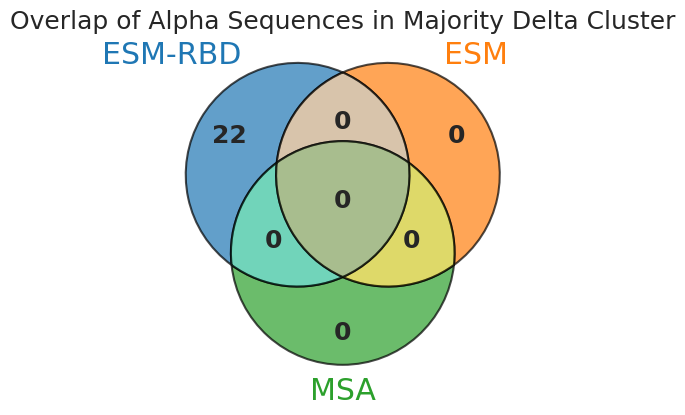

In [234]:
esm_rbd_alpha_df = esm_rbd_df[esm_rbd_df["Variant"] == "Alpha"]
esm_alpha_df = esm_df[esm_df["Variant"] == "Alpha"]
msa_alpha_df = msa_df[msa_df["Variant"] == "Alpha"]

# Convert columns to sets
set1 = set(esm_rbd_alpha_df["Seq ID"])
set2 = set(esm_alpha_df["Seq ID"])
set3 = set(msa_alpha_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Alpha only in ESM RBD majority Omicron cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Alpha only in ESM majority Omicron cluster ({len(only_in_set2)} seq(s)):\n{only_in_set2}")
print(f"Ground truth Alpha only in MSA majority Omicron cluster ({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Alpha", "Delta")

Ground truth Delta only in ESM RBD majority Omicron cluster (22 seq(s)):
{'EPI_ISL_6958671', 'EPI_ISL_3923763', 'EPI_ISL_9216909', 'EPI_ISL_9932873', 'EPI_ISL_3392894', 'EPI_ISL_4550097', 'EPI_ISL_8136309', 'EPI_ISL_7051443', 'EPI_ISL_3045407', 'EPI_ISL_8185267', 'EPI_ISL_4950220', 'EPI_ISL_4461329', 'EPI_ISL_8187047', 'EPI_ISL_8248291', 'EPI_ISL_3516777', 'EPI_ISL_3020283', 'EPI_ISL_3070867', 'EPI_ISL_8038089', 'EPI_ISL_8610358', 'EPI_ISL_4748063', 'EPI_ISL_6704463', 'EPI_ISL_8314889'}
Ground truth Delta only in ESM majority Omicron cluster (4 seq(s):
{'EPI_ISL_8310980', 'EPI_ISL_11575458', 'EPI_ISL_11814003', 'EPI_ISL_11575478'}
Ground truth Delta only in MSA majority Omicron cluster ((0 seq(s)):
set()


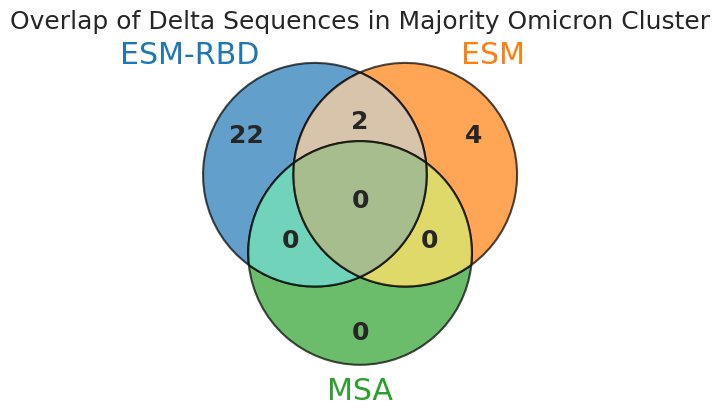

In [235]:
esm_rbd_delta_df = esm_rbd_df[esm_rbd_df["Variant"] == "Delta"]
esm_delta_df = esm_df[esm_df["Variant"] == "Delta"]
msa_delta_df = msa_df[msa_df["Variant"] == "Delta"]

# Convert columns to sets
set1 = set(esm_rbd_delta_df["Seq ID"])
set2 = set(esm_delta_df["Seq ID"])
set3 = set(msa_delta_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Delta only in ESM RBD majority Omicron cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Delta only in ESM majority Omicron cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Delta only in MSA majority Omicron cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Delta", "Omicron")

Ground truth Omicron only in ESM RBD majority Omicron cluster (120 seq(s)):
{'EPI_ISL_13762535', 'EPI_ISL_16401035', 'EPI_ISL_8335232', 'EPI_ISL_14854936', 'EPI_ISL_15356525', 'EPI_ISL_15242942', 'EPI_ISL_12559510', 'EPI_ISL_16643118', 'EPI_ISL_8801343', 'EPI_ISL_14582996', 'EPI_ISL_15936032', 'EPI_ISL_13845316', 'EPI_ISL_16495455', 'EPI_ISL_16134963', 'EPI_ISL_14971461', 'EPI_ISL_14582967', 'EPI_ISL_13845327', 'EPI_ISL_9902091', 'EPI_ISL_14007463', 'EPI_ISL_15870588', 'EPI_ISL_11144326', 'EPI_ISL_14973137', 'EPI_ISL_13804596', 'EPI_ISL_17001754', 'EPI_ISL_9366739', 'EPI_ISL_8620480', 'EPI_ISL_9366647', 'EPI_ISL_14971078', 'EPI_ISL_15870477', 'EPI_ISL_14357040', 'EPI_ISL_15782540', 'EPI_ISL_8416673', 'EPI_ISL_8606215', 'EPI_ISL_8800935', 'EPI_ISL_13901546', 'EPI_ISL_14245305', 'EPI_ISL_15805765', 'EPI_ISL_10065623', 'EPI_ISL_16674995', 'EPI_ISL_8502142', 'EPI_ISL_11145319', 'EPI_ISL_16643991', 'EPI_ISL_15317251', 'EPI_ISL_17068290', 'EPI_ISL_17239005', 'EPI_ISL_13167239', 'EPI_ISL_1006

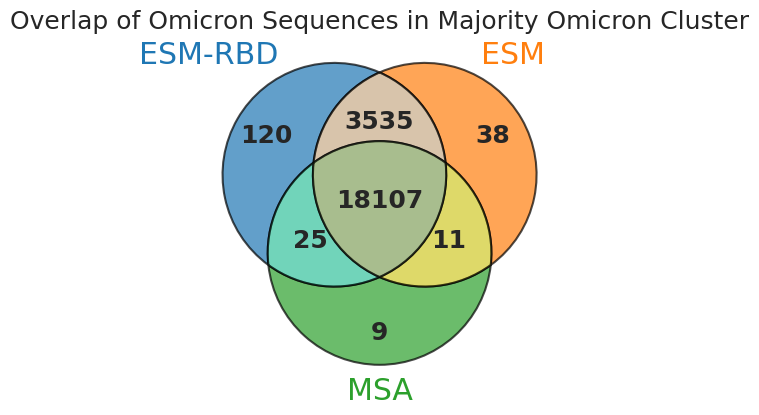

In [236]:
esm_rbd_omicron_df = esm_rbd_df[esm_rbd_df["Variant"] == "Omicron"]
esm_omicron_df = esm_df[esm_df["Variant"] == "Omicron"]
msa_omicron_df = msa_df[msa_df["Variant"] == "Omicron"]

# Convert columns to sets
set1 = set(esm_rbd_omicron_df["Seq ID"])
set2 = set(esm_omicron_df["Seq ID"])
set3 = set(msa_omicron_df["Seq ID"])

# Find differences
only_in_set1 = set1 - set2 - set3
only_in_set2 = set2 - set1 - set3
only_in_set3 = set3 - set1 - set2

print(f"Ground truth Omicron only in ESM RBD majority Omicron cluster ({len(only_in_set1)} seq(s)):\n{only_in_set1}")
print(f"Ground truth Omicron only in ESM majority Omicron cluster ({len(only_in_set2)} seq(s):\n{only_in_set2}")
print(f"Ground truth Omicron only in MSA majority Omicron cluster (({len(only_in_set3)} seq(s)):\n{only_in_set3}")

plot_venn3([set1, set2, set3], "Omicron", "Omicron")